## Описание данных

В этом примере мы получим базовое представление об аналитике рисков в банковском деле и финансовых услугах и поймем, как используются данные для минимизации риска потери денег при кредитовании клиентов.

Описание признаков приведено в файле 'columns_description'
Ссылка на данные - https://www.kaggle.com/datasets/gauravduttakiit/loan-defaulter/data?select=application_data.csv

### Импорты, загрузка данных

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('application_data.csv')

### Посмотрим на данные

In [3]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [5]:
df.shape

(307511, 122)

In [6]:
df.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [8]:
df.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

### Характеристики данных

In [9]:
df.describe(include='all').transpose().sort_values('mean')

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
DAYS_BIRTH,307511.0,NaN,NaN,NaN,-16036.995067,4363.988632,-25229.0,-19682.0,-15750.0,-12413.0,-7489.0
DAYS_REGISTRATION,307511.0,NaN,NaN,NaN,-4986.120328,3522.886321,-24672.0,-7479.5,-4504.0,-2010.0,0.0
DAYS_ID_PUBLISH,307511.0,NaN,NaN,NaN,-2994.202373,1509.450419,-7197.0,-4299.0,-3254.0,-1720.0,0.0
DAYS_LAST_PHONE_CHANGE,307510.0,NaN,NaN,NaN,-962.858788,826.808487,-4292.0,-1570.0,-757.0,-274.0,0.0
FLAG_DOCUMENT_12,307511.0,NaN,NaN,NaN,0.000007,0.00255,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
ORGANIZATION_TYPE,307511,58,Business Entity Type 3,67992,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FONDKAPREMONT_MODE,97216,4,reg oper account,73830,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HOUSETYPE_MODE,153214,3,block of flats,150503,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WALLSMATERIAL_MODE,151170,7,Panel,66040,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Для дальнейшей работы отделим категориальные и object - признаки

In [10]:
df_nums = df.select_dtypes(exclude='object')
df_objs = df.select_dtypes(include='object')

In [11]:
df_nums.columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=106)

In [12]:
df_objs.columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

## 1. Анализ NaN, пропущенных значений
### Посмотрим на количество NaN значений для каждого признака

In [13]:
### Функция для просмотра процента пропущенных значений
def percent_missing(df):
    percent_nan = 100* df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

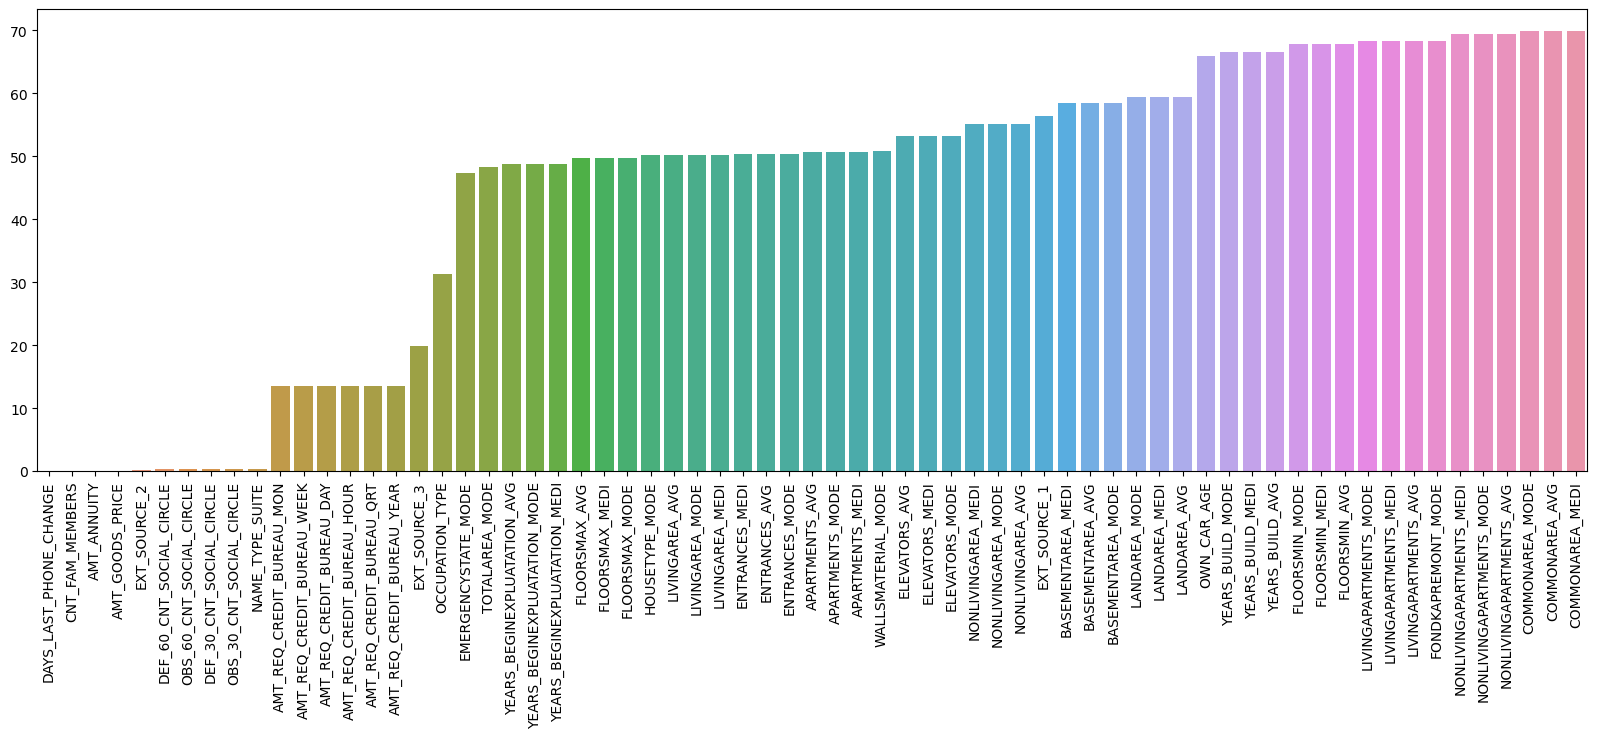

In [14]:
percent_nan = percent_missing(df)
plt.figure(figsize=(20,6))
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

### Колонки, которые не показаны на графике, не имеют пропущенных значений. Посмотрим на признаки, в которых <1% пропущенных значений

In [15]:
percent_nan[percent_nan < 1]

DAYS_LAST_PHONE_CHANGE      0.000325
CNT_FAM_MEMBERS             0.000650
AMT_ANNUITY                 0.003902
AMT_GOODS_PRICE             0.090403
EXT_SOURCE_2                0.214626
DEF_60_CNT_SOCIAL_CIRCLE    0.332021
OBS_60_CNT_SOCIAL_CIRCLE    0.332021
DEF_30_CNT_SOCIAL_CIRCLE    0.332021
OBS_30_CNT_SOCIAL_CIRCLE    0.332021
NAME_TYPE_SUITE             0.420148
dtype: float64

### Посмотрим на те колонки, в которых <1% пропущенных значений. Выведем строки с пропущенными значениями

In [16]:
df[df['DAYS_LAST_PHONE_CHANGE'].isna()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
15709,118330,0,Cash loans,M,Y,Y,0,126000.0,278613.0,25911.0,...,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df[df['CNT_FAM_MEMBERS'].isna()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
41982,148605,0,Revolving loans,M,N,Y,0,450000.0,675000.0,33750.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
187348,317181,0,Revolving loans,F,N,Y,0,202500.0,585000.0,29250.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


In [18]:
df[df['EXT_SOURCE_2'].isna()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
329,100377,0,Cash loans,M,N,N,2,157500.0,239850.0,25447.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
349,100402,0,Cash loans,F,N,Y,0,81000.0,276277.5,21825.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
617,100706,0,Cash loans,F,N,Y,0,180000.0,533668.5,22738.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
1028,101189,0,Cash loans,F,Y,Y,0,121500.0,909000.0,36180.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0
1520,101787,0,Cash loans,M,Y,Y,0,225000.0,269550.0,21294.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305775,454274,0,Cash loans,F,N,N,1,225000.0,566055.0,18387.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
306208,454779,0,Cash loans,M,N,Y,0,112500.0,562491.0,23832.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
306235,454811,0,Cash loans,F,N,Y,0,112500.0,343800.0,16155.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
307029,455713,0,Cash loans,F,Y,N,2,153000.0,808650.0,26217.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### Сколько строк пропущено в колонках с <1% пропусков ?

In [19]:
df[['EXT_SOURCE_2','CNT_FAM_MEMBERS', 'CNT_FAM_MEMBERS', 
    'DAYS_LAST_PHONE_CHANGE', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 
    'EXT_SOURCE_2','DEF_60_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 
    'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'NAME_TYPE_SUITE']].isnull().sum()

EXT_SOURCE_2                 660
CNT_FAM_MEMBERS                2
CNT_FAM_MEMBERS                2
DAYS_LAST_PHONE_CHANGE         1
AMT_ANNUITY                   12
AMT_GOODS_PRICE              278
EXT_SOURCE_2                 660
DEF_60_CNT_SOCIAL_CIRCLE    1021
OBS_60_CNT_SOCIAL_CIRCLE    1021
DEF_30_CNT_SOCIAL_CIRCLE    1021
OBS_30_CNT_SOCIAL_CIRCLE    1021
NAME_TYPE_SUITE             1292
dtype: int64

### Сколько колонок с <1% пропущенных значений ?

In [20]:
len(percent_nan[percent_nan < 1])

10

### Сколько колонок с >40% пропущенных значений ?

In [21]:
len(percent_nan[percent_nan > 40])

49

In [22]:
percent_nan[percent_nan > 40]

EMERGENCYSTATE_MODE             47.398304
TOTALAREA_MODE                  48.268517
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BEGINEXPLUATATION_MEDI    48.781019
FLOORSMAX_AVG                   49.760822
FLOORSMAX_MEDI                  49.760822
FLOORSMAX_MODE                  49.760822
HOUSETYPE_MODE                  50.176091
LIVINGAREA_AVG                  50.193326
LIVINGAREA_MODE                 50.193326
LIVINGAREA_MEDI                 50.193326
ENTRANCES_MEDI                  50.348768
ENTRANCES_AVG                   50.348768
ENTRANCES_MODE                  50.348768
APARTMENTS_AVG                  50.749729
APARTMENTS_MODE                 50.749729
APARTMENTS_MEDI                 50.749729
WALLSMATERIAL_MODE              50.840783
ELEVATORS_AVG                   53.295980
ELEVATORS_MEDI                  53.295980
ELEVATORS_MODE                  53.295980
NONLIVINGAREA_MEDI              55.179164
NONLIVINGAREA_MODE              55

### Можно визуализировать их еще одним способом:

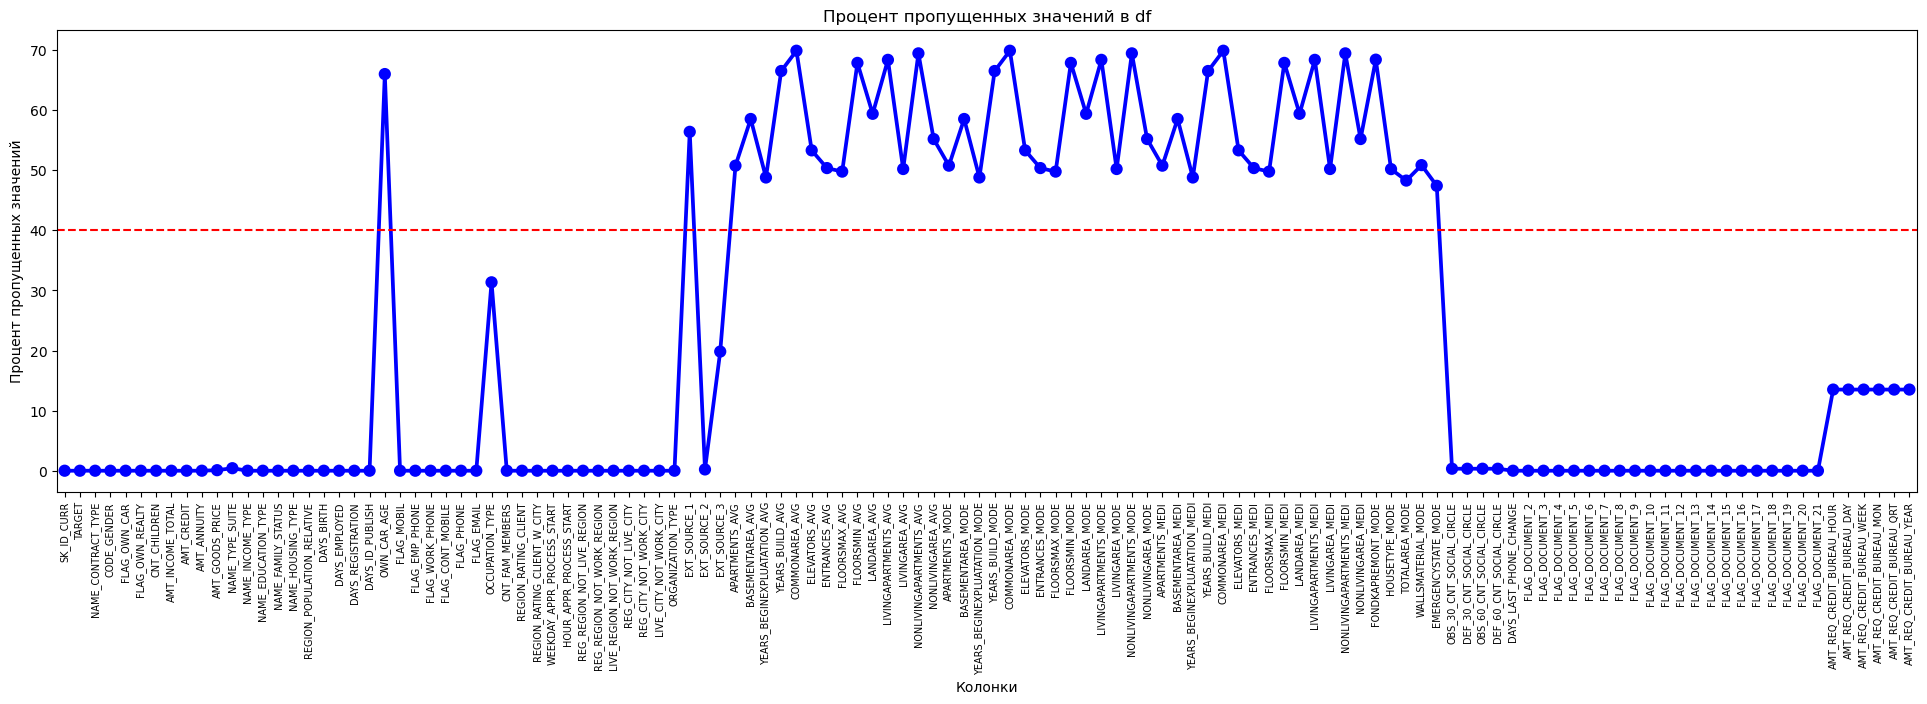

In [23]:
null_df = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
null_df.columns = ['Название колонки', 'Процент пропущенных значений']
fig = plt.figure(figsize=(24,6))
ax = sns.pointplot(x='Название колонки',y="Процент пропущенных значений",data=null_df,color='blue')
plt.xticks(rotation =90,fontsize =7)
ax.axhline(40, ls='--',color='red')
plt.title("Процент пропущенных значений в df")
plt.ylabel("Процент пропущенных значений")
plt.xlabel("Колонки")
plt.show()

## 2. Обработка пропущенных значений

### Сначала обработаем пустые значения у признаков с >40% пропусков

In [24]:
nullcol_40_previous = null_df[null_df["Процент пропущенных значений"]>=40]
Unwanted_application = nullcol_40_previous['Название колонки'].tolist()

### Получили список с колонками где % пропусков >40. Удалим колонки с большим кол-вом пропусков

In [25]:
df.drop(labels=Unwanted_application,axis=1,inplace=True)
df.shape

(307511, 73)

### Посмотрим на оставшиеся колонки с пропущенными значениями

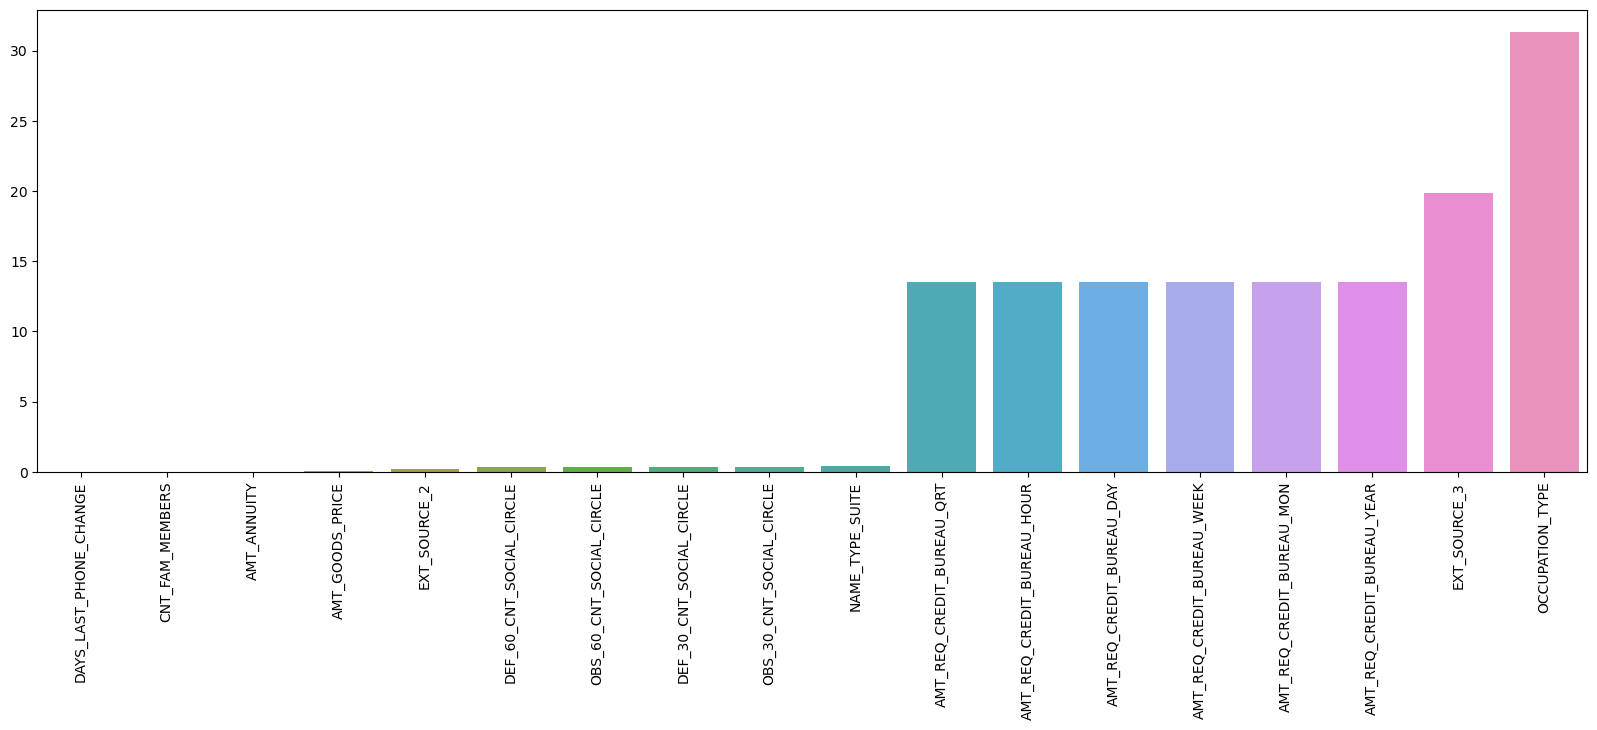

In [26]:
percent_nan = percent_missing(df)
plt.figure(figsize=(20,6))
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

### Есть колонки с <5% пропущенных значений. Посмотрим на них

In [27]:
percent_nan[percent_nan<5]

DAYS_LAST_PHONE_CHANGE      0.000325
CNT_FAM_MEMBERS             0.000650
AMT_ANNUITY                 0.003902
AMT_GOODS_PRICE             0.090403
EXT_SOURCE_2                0.214626
DEF_60_CNT_SOCIAL_CIRCLE    0.332021
OBS_60_CNT_SOCIAL_CIRCLE    0.332021
DEF_30_CNT_SOCIAL_CIRCLE    0.332021
OBS_30_CNT_SOCIAL_CIRCLE    0.332021
NAME_TYPE_SUITE             0.420148
dtype: float64

### Заполним значения с помощью KNNImputer для колонки AMT_ANNUITY

In [28]:
df[df['AMT_ANNUITY'].isnull()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
47531,155054,0,Cash loans,M,N,N,0,180000.0,450000.0,NaN,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
50035,157917,0,Cash loans,F,N,N,0,94500.0,450000.0,NaN,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
51594,159744,0,Cash loans,F,N,N,0,202500.0,539100.0,NaN,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
55025,163757,0,Cash loans,F,N,N,0,162000.0,296280.0,NaN,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0
59934,169487,0,Cash loans,M,Y,N,0,202500.0,360000.0,NaN,...,0,0,0,0,0.0,0.0,1.0,0.0,0.0,6.0
75873,187985,0,Cash loans,M,Y,N,0,144000.0,219249.0,NaN,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,11.0
89343,203726,0,Cash loans,F,Y,N,0,90000.0,157500.0,NaN,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0
123872,243648,0,Cash loans,F,N,Y,0,202500.0,929088.0,NaN,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,5.0
207186,340147,0,Cash loans,M,N,N,0,171000.0,486000.0,NaN,...,0,0,0,0,0.0,0.0,1.0,1.0,0.0,2.0
227939,364022,0,Cash loans,F,N,Y,0,315000.0,628069.5,NaN,...,0,0,0,0,0.0,0.0,1.0,0.0,0.0,2.0


In [29]:
from sklearn.impute import KNNImputer

In [30]:
imputer = KNNImputer(n_neighbors=5)

In [31]:
df['AMT_ANNUITY'] = imputer.fit_transform(df['AMT_ANNUITY'].values.reshape(-1,1))

In [32]:
df[df['AMT_ANNUITY'].isnull()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR


In [33]:
df['AMT_ANNUITY'].iloc()[89343]

27108.573909183444

### Для других колонок с <5% пропусками удалим пустые записи 

In [34]:
df = df.dropna(subset=['DAYS_LAST_PHONE_CHANGE',
'CNT_FAM_MEMBERS',
'AMT_GOODS_PRICE',
'EXT_SOURCE_2', 'NAME_TYPE_SUITE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE'])
df.shape

(304543, 73)

### Посмотрим на визуализацию пропущенных значений еще раз:

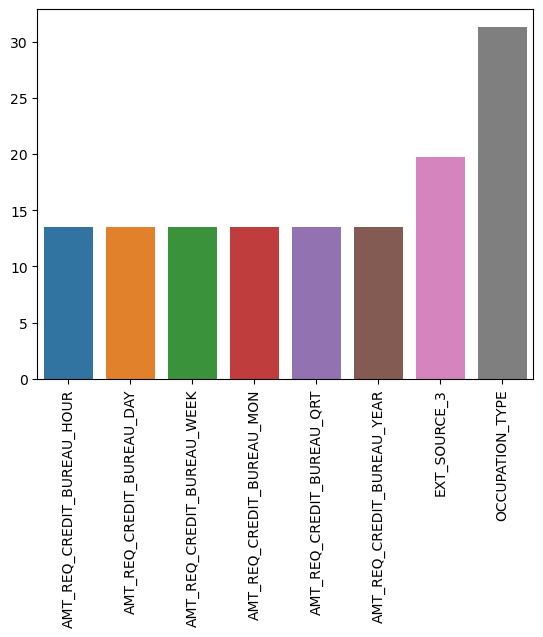

In [35]:
percent_nan = percent_missing(df)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

### AMT_REQ... Это признаки вида: 'Количество запросов в Бюро кредитных историй о клиенте за час\день\неделю и тд до подачи заявки'. EXT_SOURCE и OCCUPATION TYPE (род деятельности) - это те признаки, которые могли быть и не заполнены при сборе данных. Их можно заполнить значениями '' или 'None'. 

In [36]:
percent_nan

AMT_REQ_CREDIT_BUREAU_HOUR    13.498586
AMT_REQ_CREDIT_BUREAU_DAY     13.498586
AMT_REQ_CREDIT_BUREAU_WEEK    13.498586
AMT_REQ_CREDIT_BUREAU_MON     13.498586
AMT_REQ_CREDIT_BUREAU_QRT     13.498586
AMT_REQ_CREDIT_BUREAU_YEAR    13.498586
EXT_SOURCE_3                  19.784398
OCCUPATION_TYPE               31.337118
dtype: float64

In [37]:
features1 = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'EXT_SOURCE_3', 'OCCUPATION_TYPE']
df[features1] = df[features1].fillna('')

In [38]:
percent_nan = percent_missing(df)
percent_nan

Series([], dtype: float64)

### Категориальные колонки


In [39]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

In [40]:
df_nums = df.select_dtypes(exclude='object')
df_objs = df.select_dtypes(include='object')
cat_cols = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']


### Приведем категориальные признаки к типу category

In [41]:
df = df.apply(
        lambda x: x.astype("category") if x.dtype == "object" else x)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304543 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   304543 non-null  int64   
 1   TARGET                       304543 non-null  int64   
 2   NAME_CONTRACT_TYPE           304543 non-null  category
 3   CODE_GENDER                  304543 non-null  category
 4   FLAG_OWN_CAR                 304543 non-null  category
 5   FLAG_OWN_REALTY              304543 non-null  category
 6   CNT_CHILDREN                 304543 non-null  int64   
 7   AMT_INCOME_TOTAL             304543 non-null  float64 
 8   AMT_CREDIT                   304543 non-null  float64 
 9   AMT_ANNUITY                  304543 non-null  float64 
 10  AMT_GOODS_PRICE              304543 non-null  float64 
 11  NAME_TYPE_SUITE              304543 non-null  category
 12  NAME_INCOME_TYPE             304543 non-null

In [43]:
len(df.columns)

73

### Осталось 73 колонки после обработки пропусков

### 3. Посмотрим на корреляцию признаков. Можно оценить корреляцию признаков друг с другом и убрать те, которые сильно коррелируют друг с другом. После корреляцию с целевой переменной и уменьшить размерность с помощью SelectKbest или SelectPercentile. Кроме того, можно убрать низковариабельные переменные с помощью VarianceThreshold

In [44]:
###Отделим целевую переменную
y = df['TARGET']
X = df.drop('TARGET', axis = 1)

In [45]:
X_nums = X.select_dtypes(exclude=['category', 'object'])
X_objs = X.select_dtypes(include=['category', 'object'])

### 3.1. Корреляция признаков друг с другом

<Axes: >

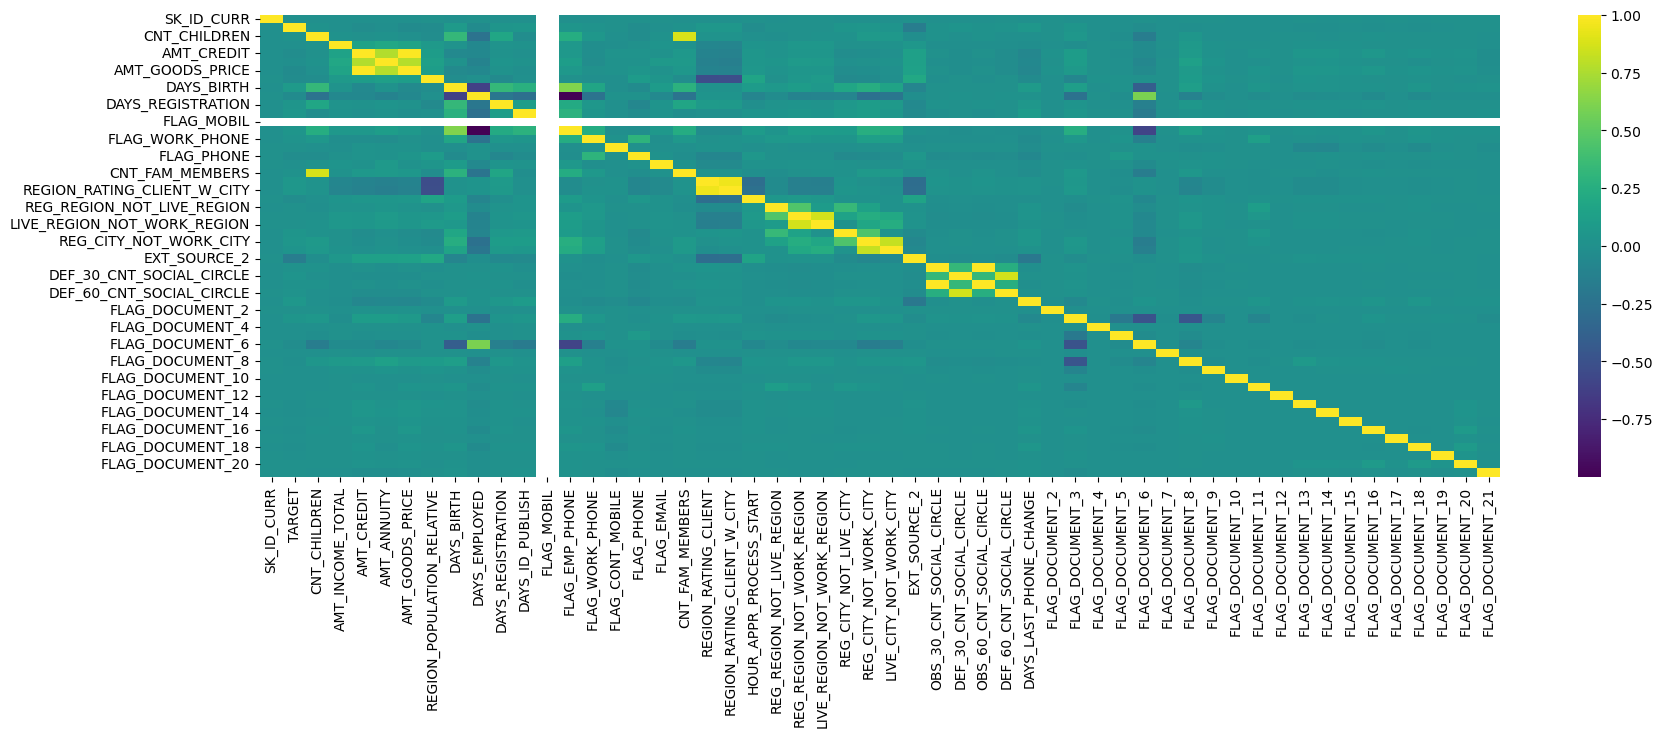

In [46]:
plt.figure(figsize = (20,6))
sns.heatmap(df[df_nums.columns].corr(), cmap ='viridis', )

### График выглядит слишком большим из-за большого количества признаков и его сложно интерпретировать. Отобразим только те признаки, которые сильно коррелируют между собой. 

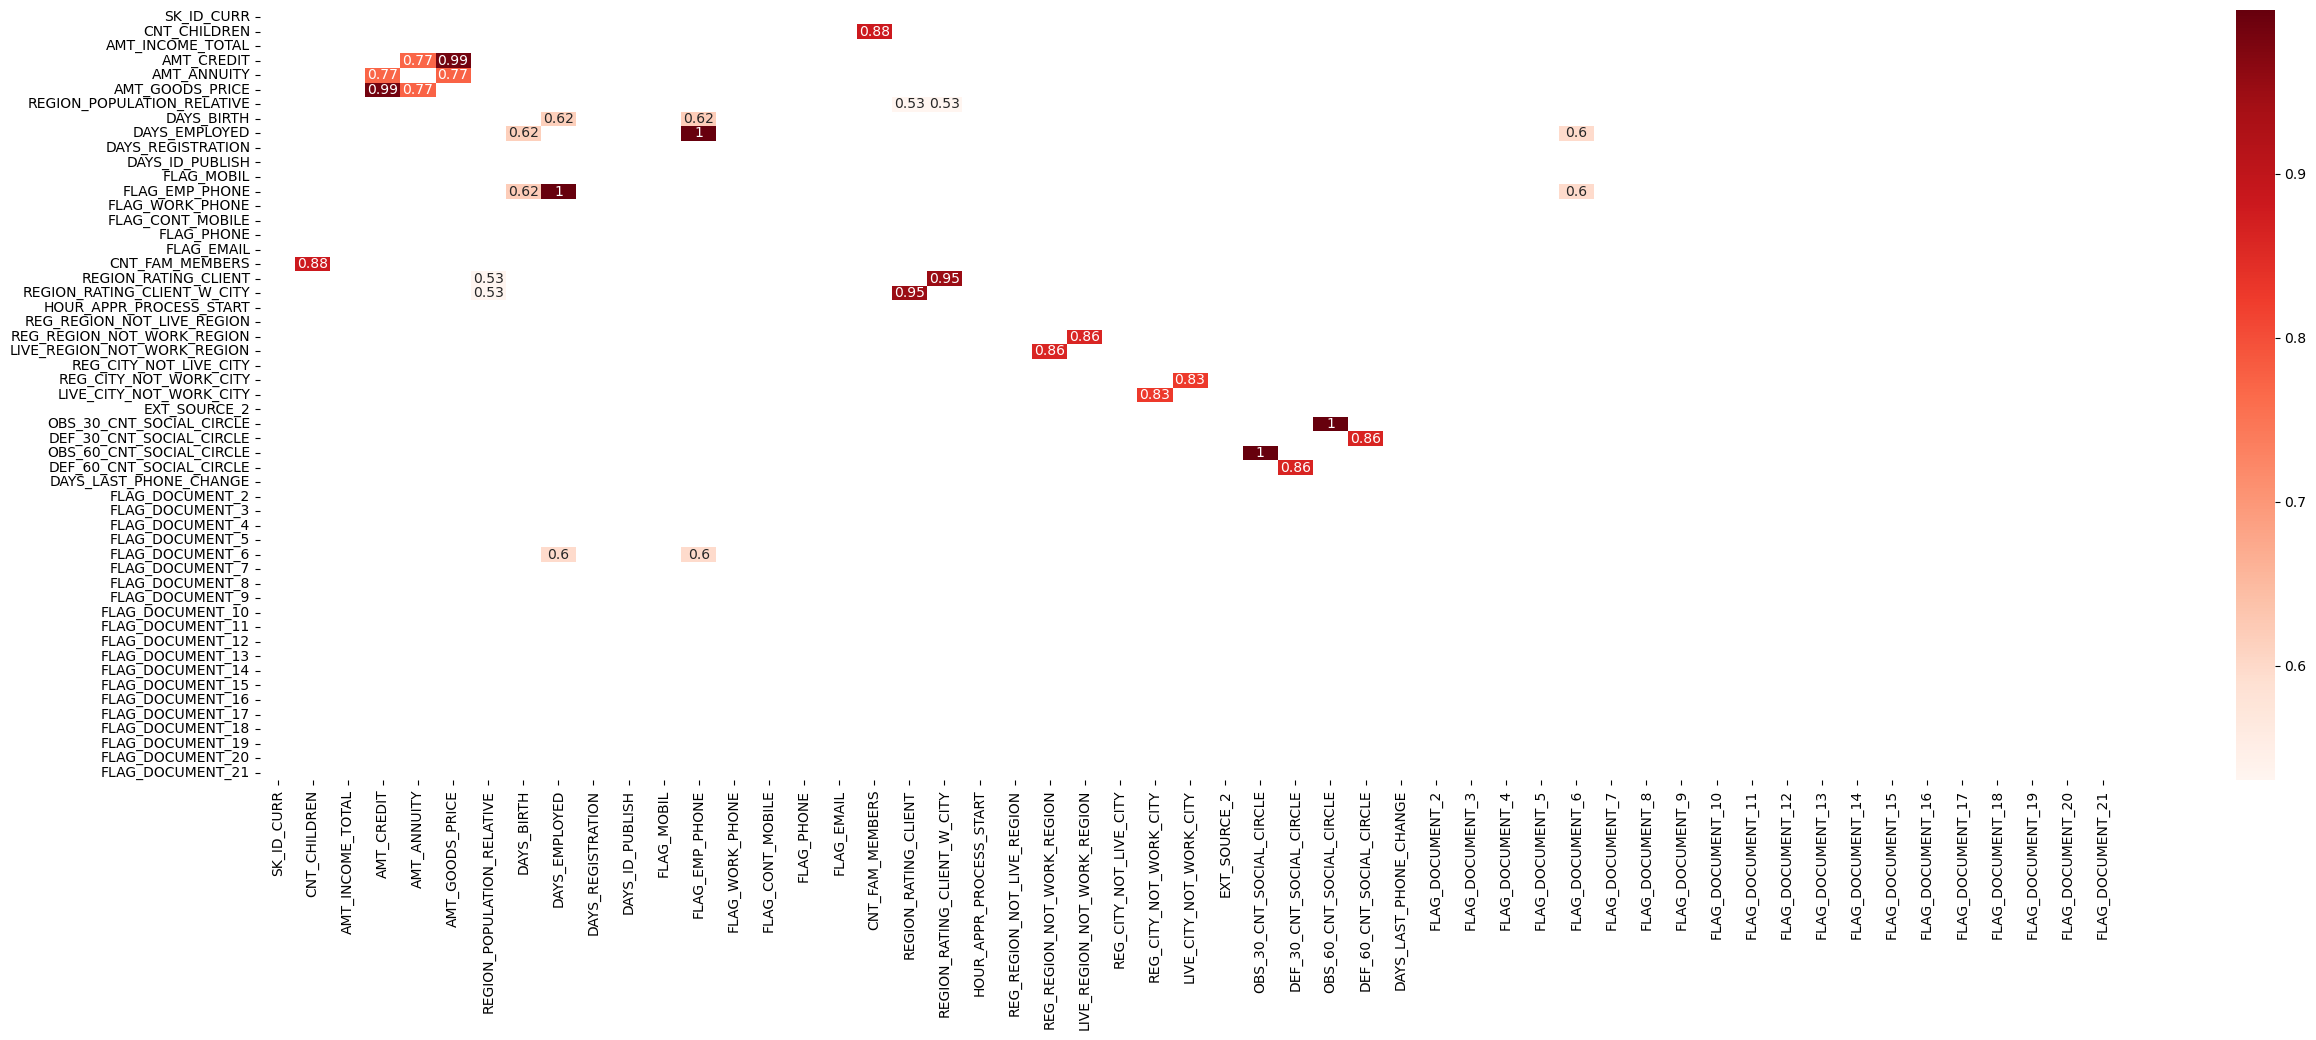

In [47]:
# Создадим корр-матрицу с абсолютными значениями
corr_matrix = X_nums.corr().abs()
# Установим порог 0.5 
threshold = 0.5
filtered_corr_X = corr_matrix[(corr_matrix >= threshold) & (corr_matrix != 1.000)]
plt.figure(figsize=(30,10))
sns.heatmap(filtered_corr_X, annot=True, cmap="Reds")
plt.show()

In [48]:
filtered_corr_X

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
SK_ID_CURR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AMT_INCOME_TOTAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AMT_CREDIT,NaN,NaN,NaN,NaN,0.769198,0.986975,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AMT_ANNUITY,NaN,NaN,NaN,0.769198,NaN,0.774262,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AMT_GOODS_PRICE,NaN,NaN,NaN,0.986975,0.774262,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
REGION_POPULATION_RELATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DAYS_BIRTH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.615930,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DAYS_EMPLOYED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.615930,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DAYS_REGISTRATION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Колонки с корреляцией > 0.7

In [49]:
def correlation(df, threshold):
    col_corr = set()
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [50]:
corr_features = correlation(X_nums, 0.7)
corr_features

{'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'CNT_FAM_MEMBERS',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'FLAG_EMP_PHONE',
 'LIVE_CITY_NOT_WORK_CITY',
 'LIVE_REGION_NOT_WORK_REGION',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'REGION_RATING_CLIENT_W_CITY'}

In [51]:
X = X.drop(corr_features, axis = 1)

In [52]:
len(X.columns)

63

### 3.2. Признаки, которые не  меняются

In [53]:
X_nums = X.select_dtypes(exclude=['category', 'object'])
X_objs = X.select_dtypes(include=['category', 'object'])

In [54]:
from sklearn.feature_selection import VarianceThreshold

In [55]:
vt = VarianceThreshold(threshold=0)

In [56]:
vt.fit(X_nums)

VarianceThreshold(threshold=0)

In [57]:
constant_columns = [column for column in X_nums.columns
                   if column not in X_nums.columns[vt.get_support()]]

In [58]:
constant_columns

['FLAG_MOBIL']

In [59]:
X = X.drop(constant_columns, axis = 1)

In [60]:
len(X.columns)

62

### Посмотрим на распределения некоторых признаков

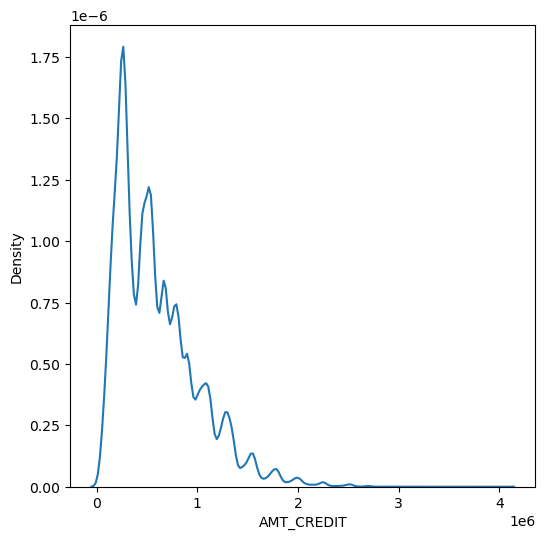

In [61]:
plt.figure(figsize=(6,6))
sns.kdeplot(df['AMT_CREDIT'])
plt.show()

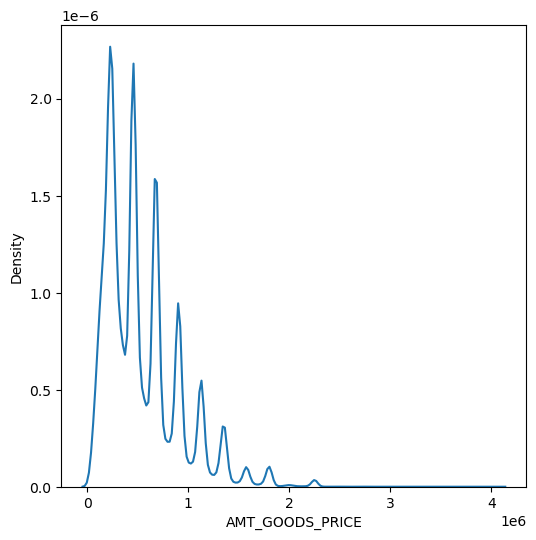

In [62]:
plt.figure(figsize=(6,6))
sns.kdeplot(df['AMT_GOODS_PRICE'])
plt.show()

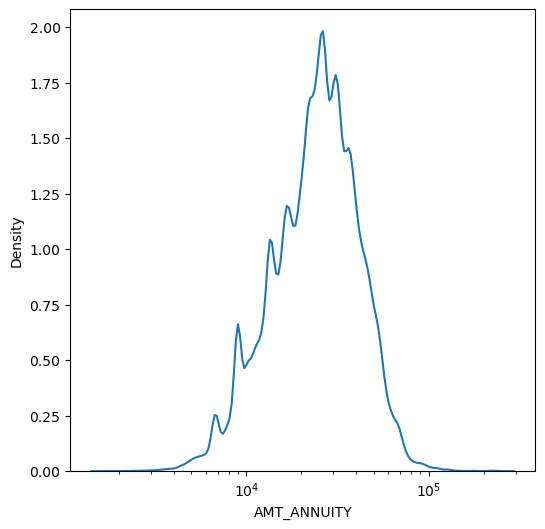

In [63]:
plt.figure(figsize=(6,6))
sns.kdeplot(df['AMT_ANNUITY'], log_scale=True)
plt.show()

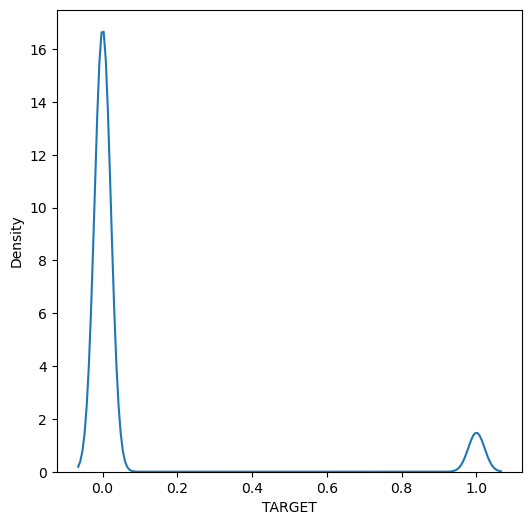

In [64]:
plt.figure(figsize=(6,6))
sns.kdeplot(df['TARGET'])
plt.show()

### Целевая переменная имеет бимодальное распределение. Многие признаки имеют ненормальное распределение с сильными скачками -  могут добавлять шум к дальнейшей модели 

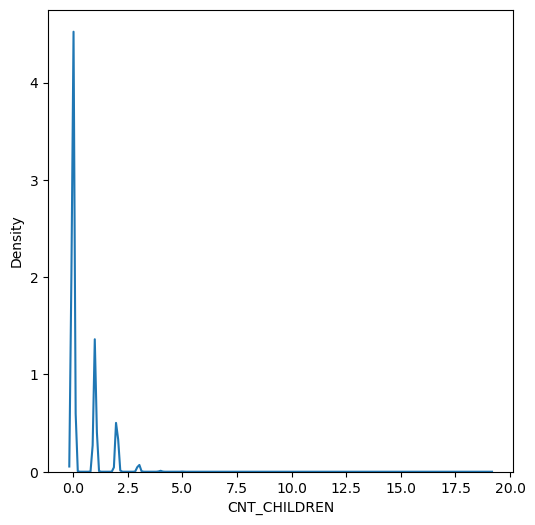

In [65]:
plt.figure(figsize=(6,6))
sns.kdeplot(df['CNT_CHILDREN'])
plt.show()

### Пример обработки выбросов методом межквартильного размаха 

In [100]:
###Функция для обработки выбросов
def remove_outliers(df, columns, k=1.5):
    for column in columns:
        # Вычислим первый и третий квантиль
        q1 = df[column].quantile(0.25) # 25-ый процентиль
        q3 = df[column].quantile(0.75) # 75-ый процентиль
        # Межквартильный размах
        iqr = q3 - q1
        #Заменяем значения за рамками [q1 * qr, q3 + k * ir]
        df[column] = df[column].clip(lower=q1 - k * iqr, upper=q3 + k * iqr)
    return df

In [103]:
X_nums.columns

Index(['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_2

<Axes: >

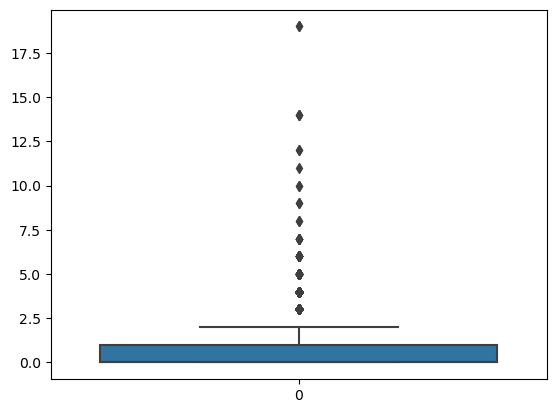

In [104]:
sns.boxplot(X['CNT_CHILDREN'])

In [105]:
X = remove_outliers(X, ['CNT_CHILDREN'])

<Axes: >

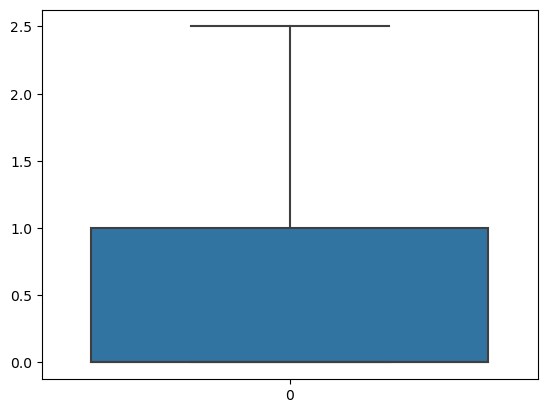

In [106]:
sns.boxplot(X['CNT_CHILDREN'])

### Другие 'ящики с усами'

<Axes: >

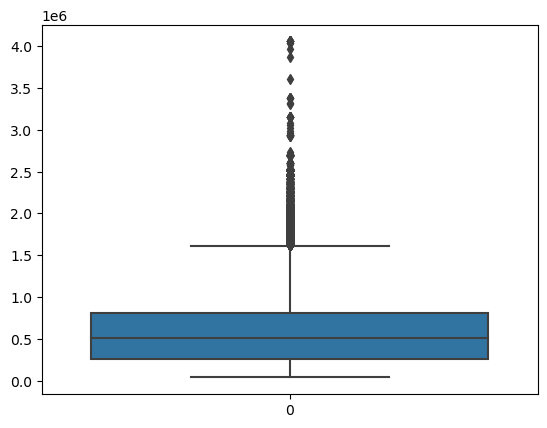

In [108]:
sns.boxplot(X['AMT_CREDIT'])

<Axes: >

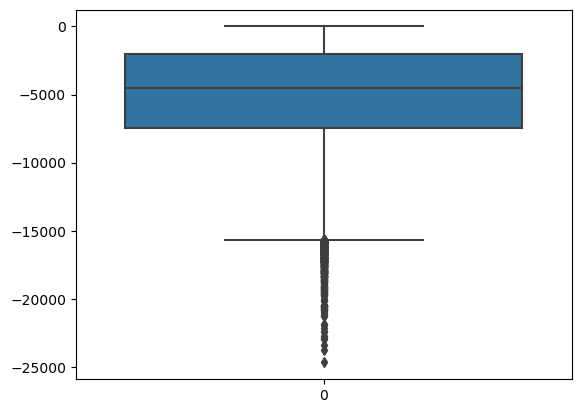

In [114]:
sns.boxplot(X['DAYS_REGISTRATION'])

<Axes: >

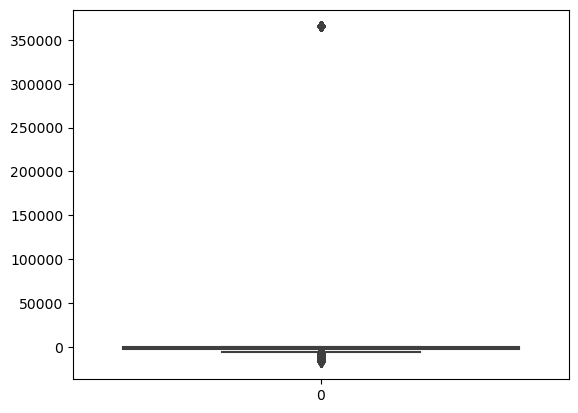

In [115]:
sns.boxplot(X['DAYS_EMPLOYED'])

<Axes: >

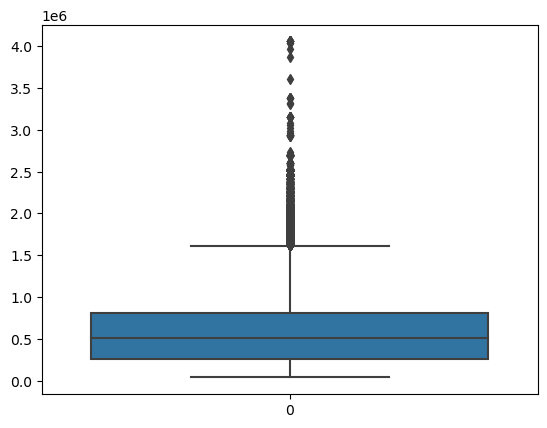

In [116]:
sns.boxplot(X['AMT_CREDIT'])

### Диаграммы рассеяния 

<Axes: xlabel='AMT_ANNUITY', ylabel='DAYS_EMPLOYED'>

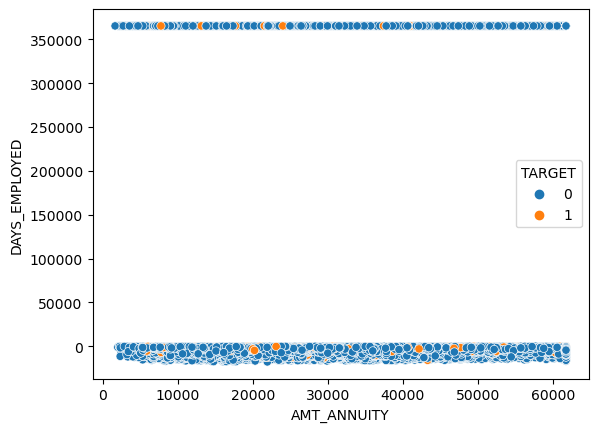

In [121]:
sns.scatterplot(data = df, x = 'AMT_ANNUITY', y = 'DAYS_EMPLOYED', hue = 'TARGET')

<Axes: xlabel='AMT_GOODS_PRICE', ylabel='AMT_CREDIT'>

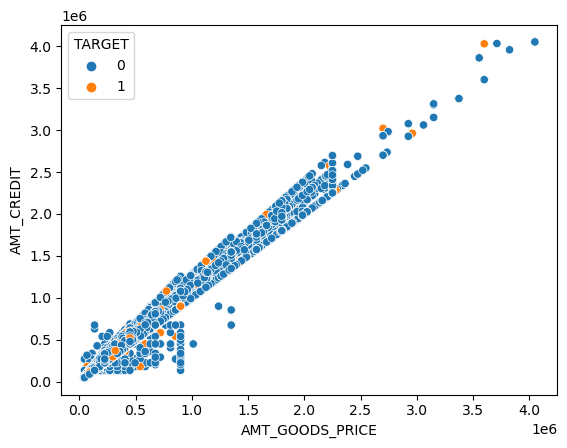

In [75]:
sns.scatterplot(data = df, x = 'AMT_GOODS_PRICE', y = 'AMT_CREDIT', hue = 'TARGET')

### Стандартизация

In [78]:
from sklearn.preprocessing import StandardScaler

In [79]:
scaler = StandardScaler()

In [80]:
scaler.fit_transform(df[df_nums.columns])

array([[-1.73345361,  3.36840778, -0.57749571, ..., -0.02397836,
        -0.02227265, -0.01812371],
       [-1.73344389, -0.29687617, -0.57749571, ..., -0.02397836,
        -0.02227265, -0.01812371],
       [-1.73343416, -0.29687617, -0.57749571, ..., -0.02397836,
        -0.02227265, -0.01812371],
       ...,
       [ 1.73262411, -0.29687617, -0.57749571, ..., -0.02397836,
        -0.02227265, -0.01812371],
       [ 1.73263384,  3.36840778, -0.57749571, ..., -0.02397836,
        -0.02227265, -0.01812371],
       [ 1.73264357, -0.29687617, -0.57749571, ..., -0.02397836,
        -0.02227265, -0.01812371]])

### Нормализация

In [81]:
from sklearn.preprocessing import MinMaxScaler

In [82]:
normalizer = MinMaxScaler()

In [83]:
df[df_nums.columns]

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,157500.0,254700.0,27558.0,225000.0,0.032561,-9327,-236,...,0,0,0,0,0,0,0,0,0,0
307507,456252,0,0,72000.0,269550.0,12001.5,225000.0,0.025164,-20775,365243,...,0,0,0,0,0,0,0,0,0,0
307508,456253,0,0,153000.0,677664.0,29979.0,585000.0,0.005002,-14966,-7921,...,0,0,0,0,0,0,0,0,0,0
307509,456254,1,0,171000.0,370107.0,20205.0,319500.0,0.005313,-11961,-4786,...,0,0,0,0,0,0,0,0,0,0


In [84]:
normalizer.fit_transform(df[df_nums.columns])

array([[0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.80699391e-06, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.61398781e-06, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [9.99994386e-01, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.99997193e-01, 1.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

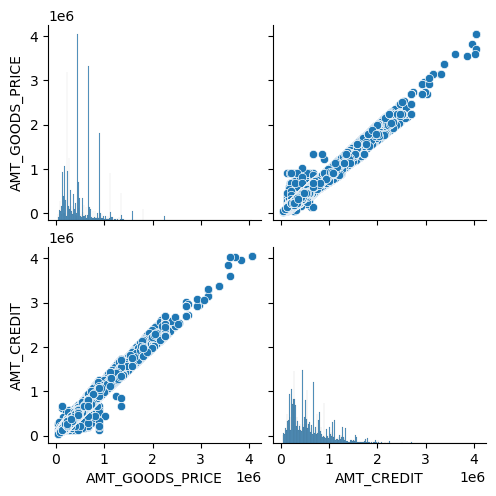

In [87]:
sns.pairplot(df[['AMT_GOODS_PRICE',
       'AMT_CREDIT']])

<Axes: xlabel='TARGET', ylabel='Count'>

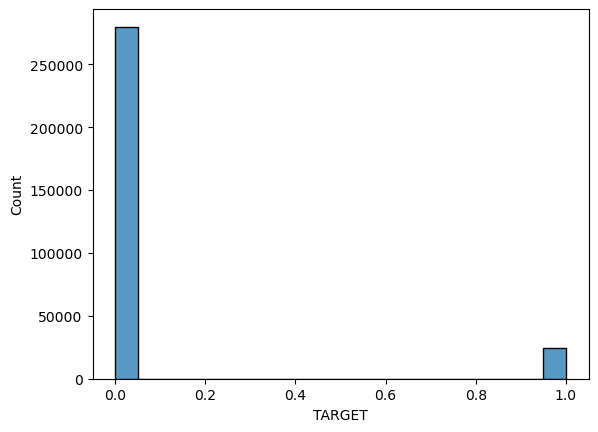

In [88]:
sns.histplot(data = df['TARGET'])

([<matplotlib.patches.Wedge at 0x21382c5ef10>,
 [Text(-1.0645796359990634, 0.27689383997500205, ''),
  Text(1.0645796554425648, -0.2768937652201476, '')])

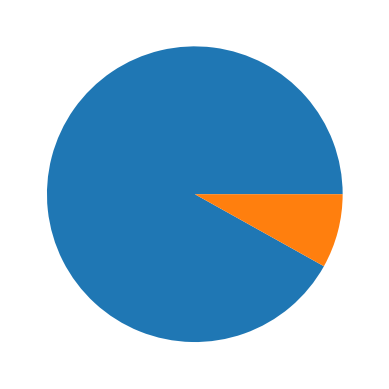

In [90]:
h, a = np.histogram(df['TARGET'], bins=2)
h
plt.pie(h)


([<matplotlib.patches.Wedge at 0x2138900f090>,
 [Text(-1.0645796359990634, 0.27689383997500205, 'Уплата кредита'),
  Text(1.0645796554425648, -0.2768937652201476, 'Пропуск кредитной выплаты')],
 [Text(-0.5806798014540344, 0.1510330036227284, '91.90'),
  Text(0.5806798120595807, -0.1510329628473532, '8.10')])

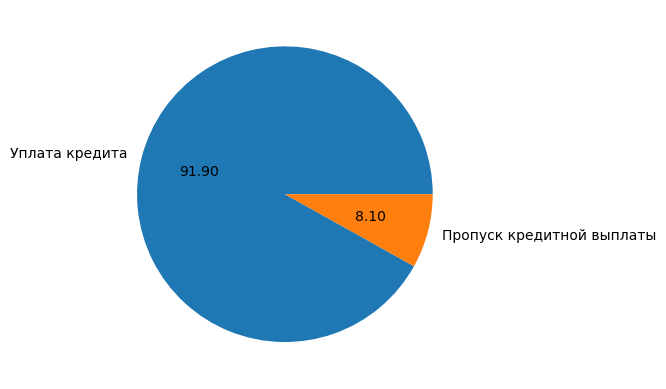

In [91]:
plt.pie(h, labels = [ 'Уплата кредита', 'Пропуск кредитной выплаты',], autopct='%.2f')

In [92]:
from scipy.stats import shapiro

In [93]:
len(df['AMT_GOODS_PRICE'][:400])

400

### Тесты Шапиро 

In [94]:
shapiro(StandardScaler().fit_transform(df['AMT_GOODS_PRICE'][:100].values.reshape(-1,1)))

ShapiroResult(statistic=0.9037144780158997, pvalue=2.1227308479865314e-06)

In [95]:
datax = df['AMT_GOODS_PRICE'][:100].values.reshape(-1,1)
shapiro(np.log(datax))

ShapiroResult(statistic=0.9770690202713013, pvalue=0.07838694751262665)

In [96]:
datax = df['AMT_GOODS_PRICE'][:100].values.reshape(-1,1)
shapiro(datax)

ShapiroResult(statistic=0.9037144780158997, pvalue=2.1227308479865314e-06)

In [97]:
shapiro(StandardScaler().fit_transform(df['TARGET'][:100].values.reshape(-1,1)))

ShapiroResult(statistic=0.2524155378341675, pvalue=2.964717420496913e-20)

In [98]:
shapiro(StandardScaler().fit_transform(df['DAYS_EMPLOYED'][:100].values.reshape(-1,1)))

ShapiroResult(statistic=0.4094409942626953, pvalue=3.2735039948617467e-18)